In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg
import cereeberus.distance.ilp_torus_line as ilp_tl
import cereeberus.distance.ilp as ilp

import matplotlib.pyplot as plt
import math

# section hyperlink
[Section 3: Go here!!](#section_3)

## This notebook aims to find the the optimized loss function for a line mapper and a loop mapper over multiple iterations. Also the loop size of the mappers are varied to test out the optimization.

## Section 1: Line and Loop Mapper Visualization



Text(0.5, 1.0, 'Torus Mapper')

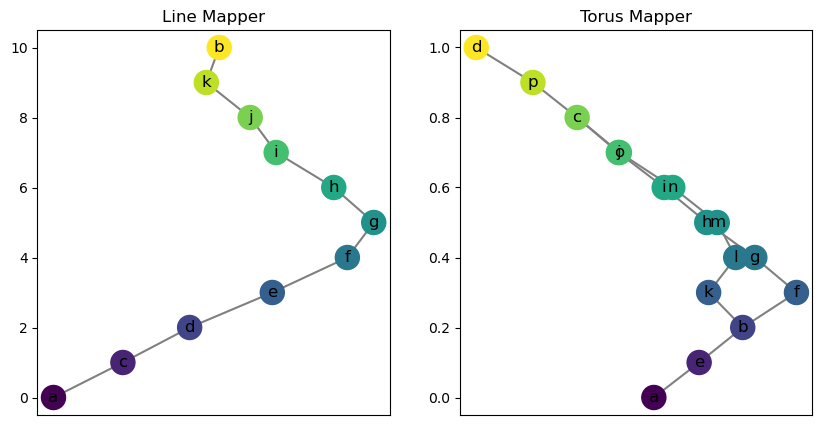

In [4]:
# display the line and loop mapppers from ex_mappergraphs.py


M1 = ex_mg.line(0,10, seed=10)
M2 = ex_mg.torus(0,2,8,10, seed=10)

# plot these two mappers as subplots
fig, axs = plt.subplots(1,2, figsize=(10,5))

M1.draw(ax = axs[0])
axs[0].set_title('Line Mapper')

M2.draw(ax = axs[1])
axs[1].set_title('Torus Mapper')


## Section 2: Loss Function Optimization with ILP for different loop sizes and thicknesses

### We will try to find the optimized loss function for the line and loop mapper over different values of n.

In [5]:
best_loss_dict = {}
for n in range(4, 23): # corresponds to loop sizes of 1 to 19
    a, b, c, d = 0, 2, n, n+2

    print (f"running for n={n}")

    line = ex_mg.line(a,d, seed=10)
    torus = ex_mg.torus(a,b,c,d, seed=10)

    losses_before, losses_after = ilp_tl.run_optimization_multi_n(line, torus, range(1,n//4+1))

    ub_before, ub_after = [num + i for i, num in enumerate(losses_before, start=1)], [num + i for i, num in enumerate(losses_after, start=1)]


    # plt.plot(range(1,n//2), ub_before, label=f'Before n={n}')
    # plt.plot(range(1,n//2), ub_after, label=f'After n={n}')

    best_loss_dict[n] = min(ub_after)



running for n=4
running for n=5
running for n=6
running for n=7
running for n=8
running for n=9
running for n=10
running for n=11
running for n=12
running for n=13
running for n=14
running for n=15
running for n=16
running for n=17
running for n=18
running for n=19
running for n=20
running for n=21
running for n=22


Text(0, 0.5, 'Distance (Optimized or True)')

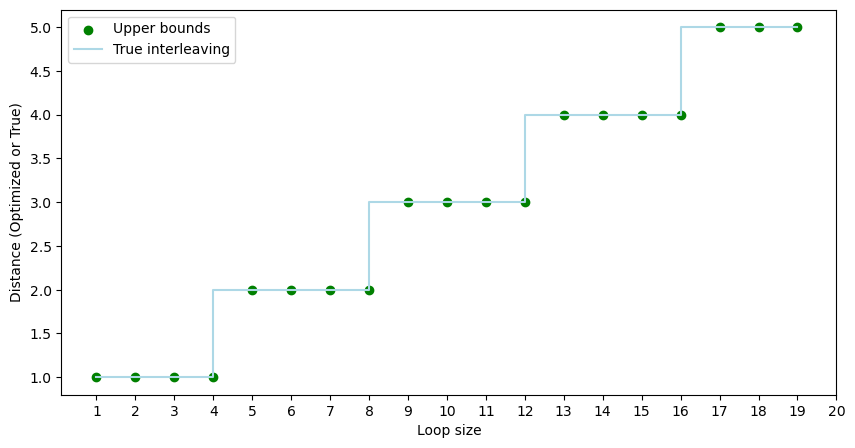

In [6]:
c_val = list(best_loss_dict.keys())
loop_size = [i-3 for i in c_val] # loop size is c - b - 1

upper_bounds = list(best_loss_dict.values())

# true interleaving 
true_int = [math.ceil(i/4) for i in loop_size]
plt.figure(figsize=(10,5))
plt.scatter(loop_size, upper_bounds, color='green')
plt.step(loop_size, true_int, color='lightblue')
plt.xticks(range(1,21))
plt.legend(['Upper bounds', 'True interleaving'])
plt.xlabel('Loop size')
plt.ylabel('Distance (Optimized or True)')


# Section 3: See how the assignment change for different values of n



<a id='section_3'></a>

loss before optimization: 7.0
loss after optimization: 6.0


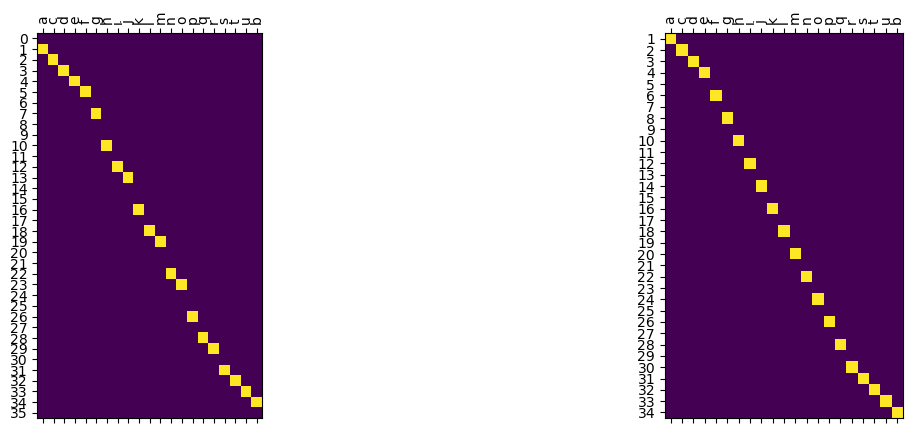

In [7]:
line = ex_mg.line(0,20, seed=10)
torus = ex_mg.torus(0,2,18, 20, seed=10) # loop size is 15

# create an interleaving object
myInt = Interleave(torus, line, n = 1, initialize_random_maps= True, seed=1)

# optimize the interleaving
maps, loss = ilp.solve_ilp(myInt)

# make subplots
fig, axs = plt.subplots(1,2, figsize=(15,5))

# psi map before optimization
myInt.psi('0', 'V').draw(ax = axs[0])

# psi map after optimization
maps['Psi_0_V'].draw(ax = axs[1])



print(f"loss before optimization: {myInt.loss()}")
print(f"loss after optimization: {loss}")



### checking if the loss is computed correctly when we pass the correct maps to the interleaving object

In [8]:
line = ex_mg.line(0,16, seed=10)
torus = ex_mg.torus(0,2,14,16, seed=10) # loop size is 11

# create an interleaving object
myInt = Interleave(torus, line, n = 1, initialize_random_maps= True, seed=1)

# optimize the interleaving
maps, loss = ilp.solve_ilp(myInt)

print(f"loss before optimization: {myInt.loss()} and loss after optimization: {loss}")


loss before optimization: 5.0 and loss after optimization: 4.0


### Plot to check if the maps are correct

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<Axes: >

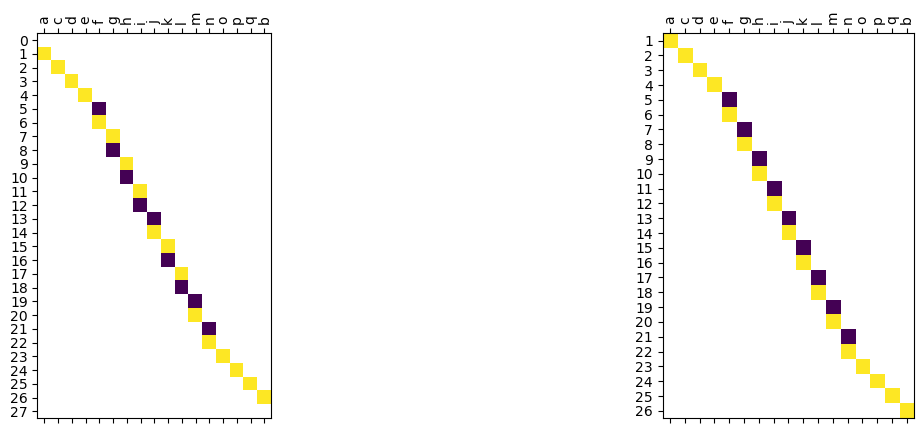

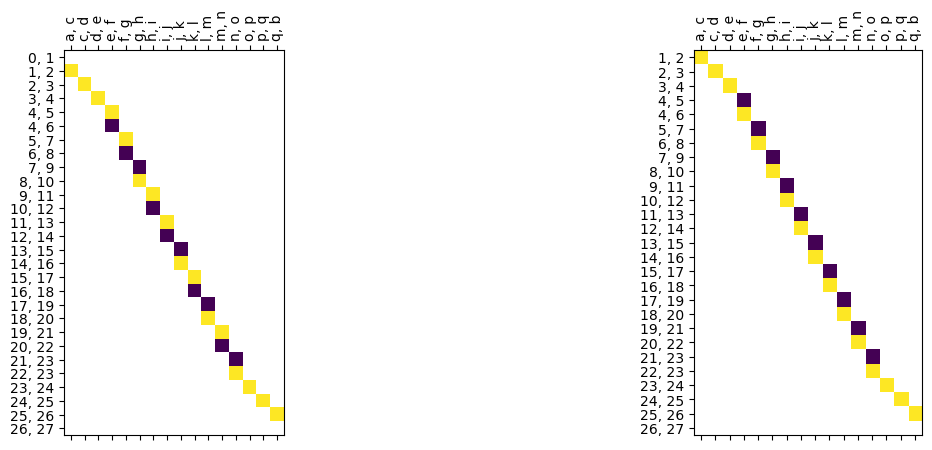

In [9]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

# psi map before optimization (vertex)
myInt.psi('0', 'V').draw(ax = axs[0], filltype='nan')

# psi map after optimization (vertex)
maps['Psi_0_V'].draw(ax = axs[1], filltype='nan')

fig, axs = plt.subplots(1,2, figsize=(15,5))

# psi map before optimization (edge)
myInt.psi('0', 'E').draw(ax = axs[0],  filltype='nan')

# psi map after optimization (edge)
maps['Psi_0_E'].draw(ax = axs[1],  filltype='nan')


### put these maps to create a new interleaving object and draw an empty map

<class 'numpy.ndarray'>


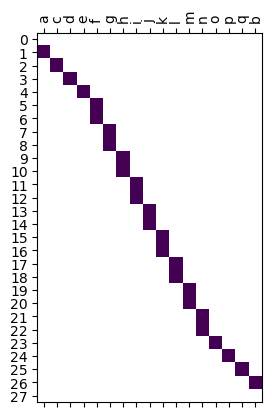

In [10]:
newInt = Interleave(torus, line, n = 1, initialize_random_maps= False)

newInt.psi('0', 'V').draw(filltype='nan')

### Put the correct maps to the interleaving object and draw the map

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<Axes: >

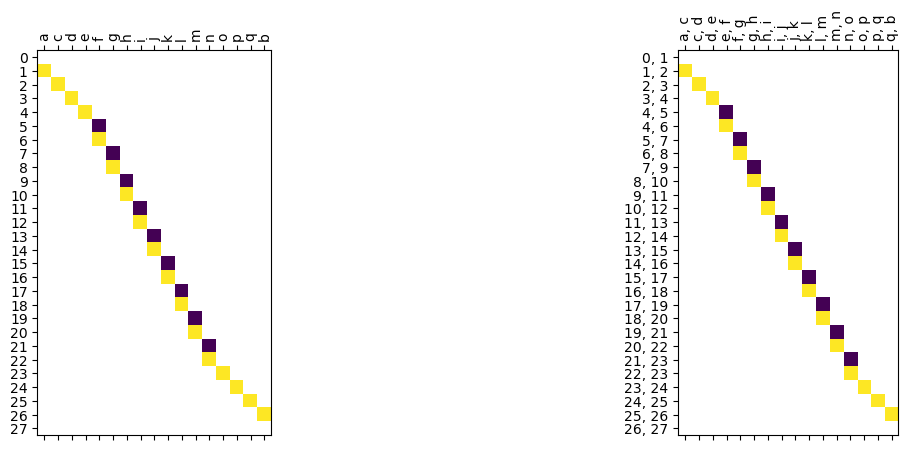

In [11]:
phi_dict = {'0': {'V': maps['Phi_0_V'], 'E': maps['Phi_0_E']}, 'n': {'V': maps['Phi_n_V'], 'E': maps['Phi_n_E']}}
psi_dict = {'0': {'V': maps['Psi_0_V'], 'E': maps['Psi_0_E']}, 'n': {'V': maps['Psi_n_V'], 'E': maps['Psi_n_E']}}

newInt.set_interleaving_maps(phi_dict, psi_dict)

# plot psi vertex and edge maps as subplots

fig, axs = plt.subplots(1,2, figsize=(15,5))

newInt.psi('0', 'V').draw(ax = axs[0],filltype='nan')
newInt.psi('0', 'E').draw(ax = axs[1],filltype='nan')

### compute the loss for the whole matrices

In [12]:
newInt.loss(verbose=True)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0]


4.0

We see that the loss is 4 for the triangles F-G-F (vertex and edge). These are the torus-line-torus maps

### Now compute loss by block to see how that is changing

In [13]:
newInt.loss_by_block(verbose=True)

[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


4.0

See that the loss increases inside the loop of the torus and it is maximum at the middle of the loop

### Let's check how the triangle loss looks like in terms of matrix multiplication

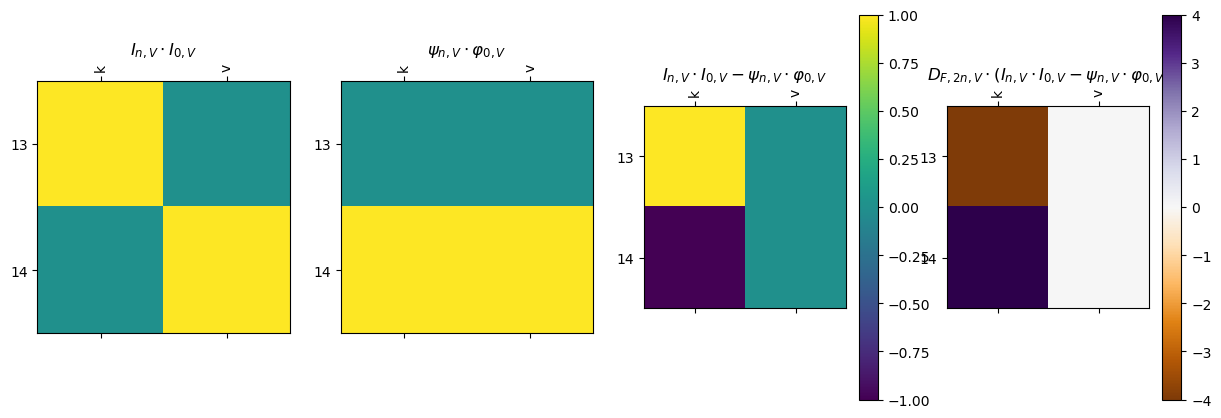

In [14]:
trianlge_loss_vertex = newInt.triangle(start_graph='F', obj_type='V', draw=True, returntype='dist', func_val=8)
#  max value is at 8 for vertex

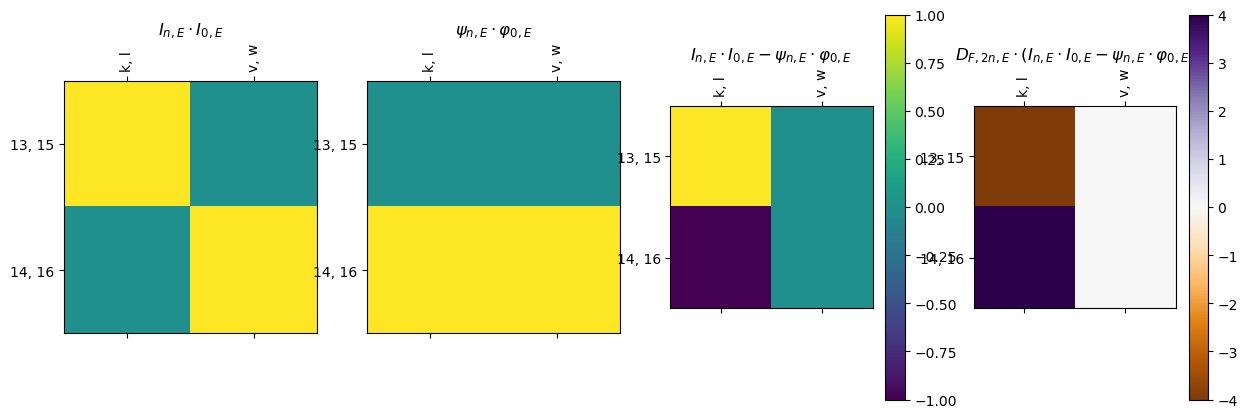

In [15]:
taingle_loss_edge = newInt.triangle(start_graph='F', obj_type='E', draw=True, returntype='dist', func_val=8)
# max value is at 7 or 8 for edge

### The individual matrices are computed correctly.Then? 

Interleaving distance is 3. Hence the Loss should have been 2. But it is double. 

# Relationship between the thickening parameter and the optimized loss function/upper bound

In [16]:
a = 0
b = 2
c = 30 # loop size is 28
d = 32

for i in range(1, 10):
    losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, c, d, i, 1)

# Save to a text file
with open("lt_losses_0_2_30_32_1.txt", "w") as file:
    for key, value in losses_dict.items():
        file.write(f"{key}: {value}\n")

NameError: name 'solver_iter' is not defined

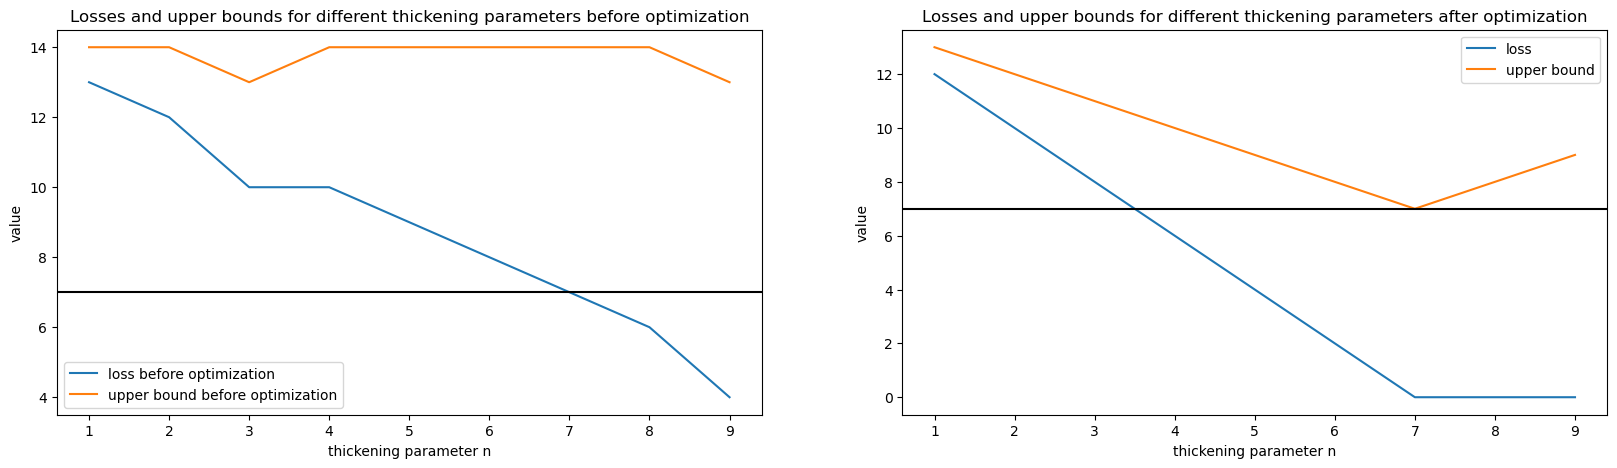

In [ ]:
# Plot the results


plt.figure(figsize=(20, 5))
plt.subplot(121)

plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][0][0] for i in range(1, 10)], label="loss before optimization")
plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][0][0]+i for i in range(1, 10)], label="upper bound before optimization")

plt.axhline(y = 7, color = 'k', linestyle = '-')
plt.xlabel("thickening parameter n")
plt.ylabel("value")
plt.legend()
plt.title("Losses and upper bounds for different thickening parameters before optimization")
plt.subplot(122)
plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][1][0] for i in range(1, 10)], label="loss")
plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][1][0]+i for i in range(1, 10)], label="upper bound")
plt.axhline(y = 7, color = 'k', linestyle = '-')
plt.xlabel("thickening parameter n")
plt.ylabel("value")
plt.legend()
plt.title("Losses and upper bounds for different thickening parameters after optimization")
plt.show()

# How does the loss change with change of loop size?

In [ ]:
a = 0
b = 2

n =1
for i in range(4, 50):
    c = i
    d = i+2
    losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, c, d, n, 1)

# Save to a text file
with open("lt_losses_0_2_x_x+2_1.txt", "w") as file:
    for key, value in losses_dict.items():
        file.write(f"{key}: {value}\n")

KeyboardInterrupt: 

In [ ]:
# Plot the results

def compute_loss_dict_diff_loopsize(largest_loop, n):
    a = 0
    b = 2
    c = range(4, largest_loop)
    losses_dict = {}

    for i in c:
        losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, i, i+2, n, 1)

    return losses_dict

def plot_fig_diff_loopsize(largest_loop, n):

    losses_dict = compute_loss_dict_diff_loopsize(largest_loop, n)


    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][0][0] for i in range(4, largest_loop)], label="loss before optimization")
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][0][0]+n for i in range(4, largest_loop)], label="upper bound before optimization")
    plt.xticks(range(2, largest_loop-2))
    plt.yticks(range(int(min([losses_dict[f"losses_{i}"][0][0] for i in range(4, largest_loop)])), 
                    int(max([losses_dict[f"losses_{i}"][0][0]+i for i in range(4, largest_loop)])) + 1))
    plt.step(range(2, largest_loop-2), [math.ceil(i/4) for i in range(2, largest_loop-2)], label="true interleaving")
    plt.xlabel("loop size")
    plt.ylabel("value")
    plt.legend()
    plt.title("Losses and upper bounds for different loop sizes before optimization")
    plt.subplot(122)
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][1][0] for i in range(4, largest_loop)], label="loss")
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][1][0]+n for i in range(4, largest_loop)], label="upper bound")
    plt.xticks(range(2, largest_loop-2))
    plt.yticks(range(int(min([losses_dict[f"losses_{i}"][1][0] for i in range(4, largest_loop)])), 
                    int(max([losses_dict[f"losses_{i}"][1][0]+i for i in range(4, largest_loop)])) + 1))
    plt.step(range(2, largest_loop-2), [math.ceil(i/4) for i in range(2,largest_loop-2)], label="true interleaving")
    plt.xlabel("loop size")
    plt.ylabel("value")
    plt.legend()
    plt.title("Losses and upper bounds for different loop sizes after optimization")
    plt.show()
